In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df= pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [3]:
df.shape

(195, 6)

In [4]:
df.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [5]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [7]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
df['Rate'] = df['Rate'].astype(int)

In [10]:
my_list = ['Rate','Count','Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [11]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [21]:
df['Region'].replace('Americas','N/S Americas',inplace=True)

In [22]:
df1 = df.sort_values('Count',ascending=False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S Americas,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S Americas,Central America,28,36579,2020
4,United States,N/S Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [23]:
df1 = df[['Location', 'Count']].sort_values(by= 'Count',ascending=False).head()
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


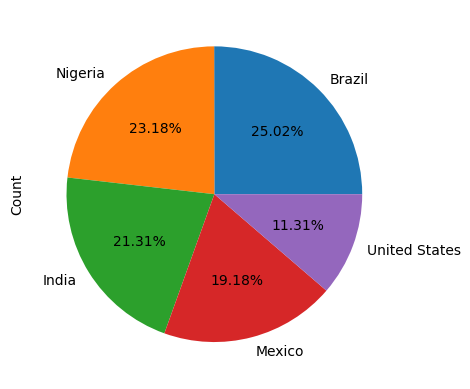

In [24]:
df1.plot(x = 'Location', y= 'Count', kind = 'pie', labels = df1.Location,autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [25]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
N/S Americas    153597
Asia            105552
Africa           99481
Europe           19869
Oceania            347
Name: Count, dtype: int32

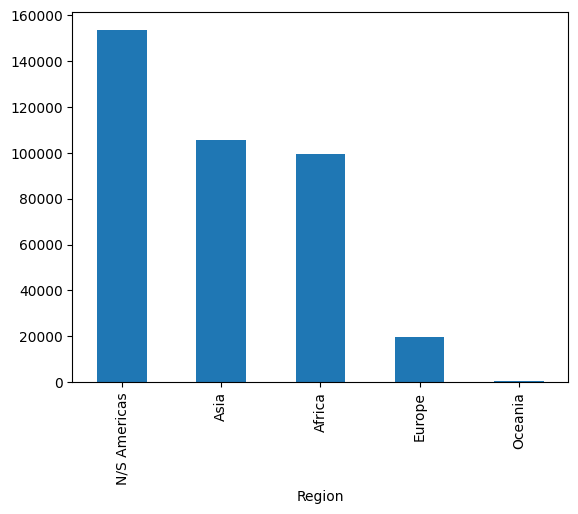

In [26]:
df2.plot(kind = 'bar')
plt.show()

In [28]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

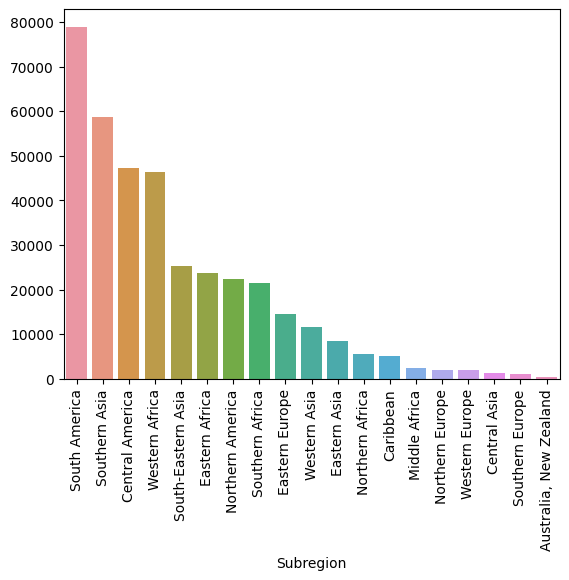

In [30]:
sns.barplot(x= df3.index, y =df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None

In [31]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [32]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [34]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [37]:
df4 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]

In [38]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [39]:
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [41]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [43]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

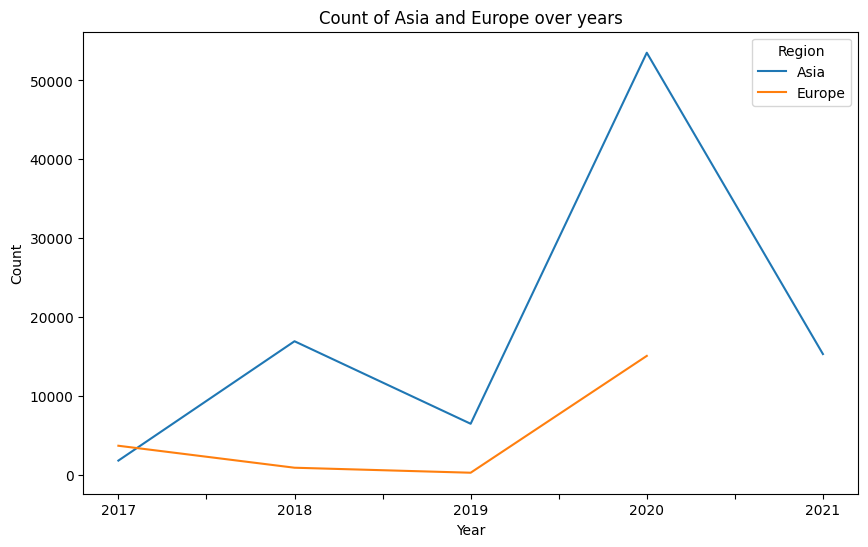

In [45]:
df_unstacked.plot(kind = 'line', figsize=(10,6))
plt.title("Count of Asia and Europe over years")
plt.xlabel("Year")
plt.ylabel('Count')
plt.show()

In [46]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending=False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

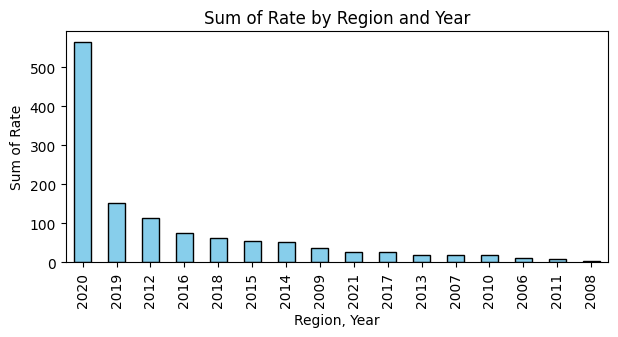

In [48]:
df5.plot(kind= 'bar', figsize = (7,3), color = 'skyblue', edgecolor = 'black')
plt.title("Sum of Rate by Region and Year")
plt.xlabel("Region, Year")
plt.ylabel('Sum of Rate')
plt.show()

In [52]:
df6 = df[['Year', 'Region', 'Count']]
df6 =df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year',ascending=False)
df6

Count
Year Region              
2021 Asia           15299
2020 Oceania          221
     N/S Americas  134784
     Europe         15066
     Asia           53516
     Africa         28460
2019 Europe           249
     Africa         44210
     Asia            6458
     N/S Americas    4276
     Oceania          126
2018 N/S Americas   13793
     Europe           883
     Asia           16923
2017 Europe          3670
     Asia            1787
     Africa          1467
2016 Asia             627
     N/S Americas     608
     Europe             0
     Africa          4987
2015 Asia             241
     Africa          2206
     Europe             0
2014 N/S Americas      13
     Asia            3029
2013 Asia            5782
2012 Africa         15264
     N/S Americas      53
     Asia              61
2011 Asia            1626
     Africa           855
     Europe             0
2010 Europe             1
     Africa           303
2009 N/S Americas      42
     Africa            27
2008 Africa          1702
2007 N/S Americas      26
2006 N/S Americas       2
     Asia             203

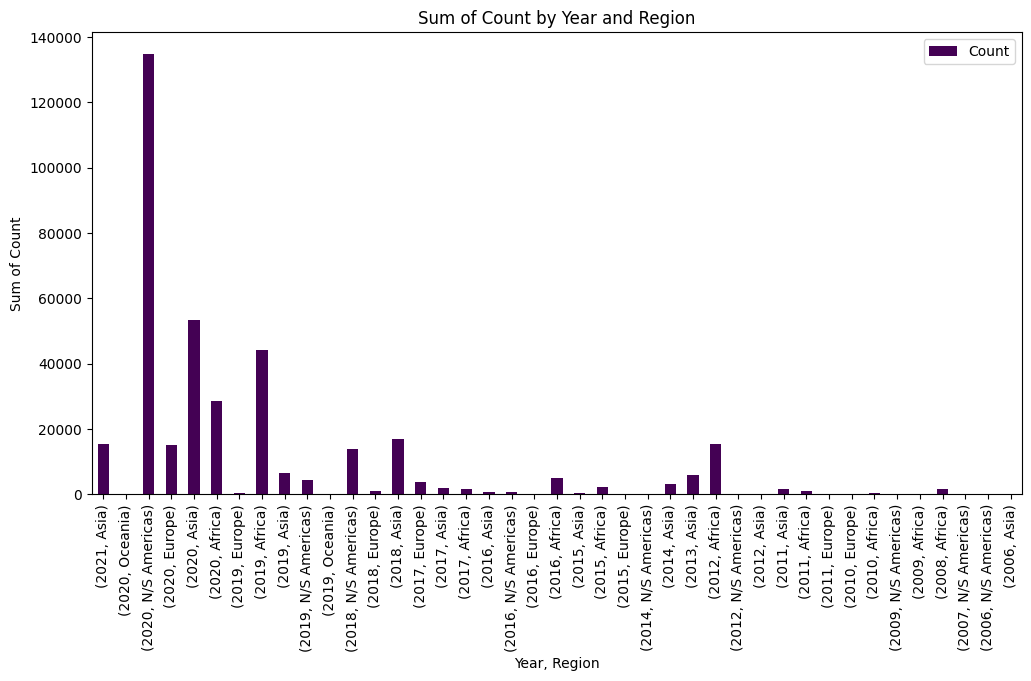

In [54]:
df6.plot(kind = 'bar',figsize=(12,6), colormap ='viridis')
plt.title("Sum of Count by Year and Region")
plt.xlabel("Year, Region")
plt.ylabel("Sum of Count")
plt.show()

In [57]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [58]:
data = {
    'Category':df7.index,
    'Value':df7.values,
    'Info':df7.values
}
df8 = pd.DataFrame(data)
df8

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [63]:
fig = px.treemap(df8, path = ['Category'], values = 'Value',title = 'Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Value:%{value}')
fig.show()